<a href="https://colab.research.google.com/github/PriyankaGona/MachineLearning-Assignments/blob/master/hw2_model1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Required headers and libraries are imported
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from sklearn.utils import shuffle
from keras.optimizers import Adam
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
# Required variables are declared
batch_size = 32
num_classes = 10
epochs = 100

#Loading and shuffling Cifar10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, y_train = shuffle(x_train, y_train, random_state=0)

split_index = int(0.8 * x_train.shape[0])


y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

# Dividing data into training and validation sets
train_x = x_train[:split_index]
train_y = y_train[:split_index]

validate_x = x_train[split_index:]
validate_y = y_train[split_index:]

print("\nnumber of samples in training set: ",len(train_x))
print("number of samples in validation set: ",len(validate_x))




number of samples in training set:  40000
number of samples in validation set:  10000


In [0]:
# Defining the model - This is a Basic architecture with 3 layers.
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=train_x.shape[1:]))
model.add(Activation('relu'))

model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(512))
model.add(Activation('relu'))

model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.summary()
  
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.0001, decay=1e-6),
              metrics=['accuracy'])


Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
acti

Instructions for updating:
Use tf.cast instead.
Train on 40000 samples, validate on 10000 samples
Epoch 1/100
40000/40000 [==============================] - 34s 849us/step - loss: 1.6478 - acc: 0.4094 - val_loss: 1.3980 - val_acc: 0.5008
Epoch 2/100
40000/40000 [==============================] - 30s 758us/step - loss: 1.2923 - acc: 0.5432 - val_loss: 1.2352 - val_acc: 0.5694
Epoch 3/100
40000/40000 [==============================] - 30s 759us/step - loss: 1.1417 - acc: 0.5978 - val_loss: 1.1546 - val_acc: 0.6016
Epoch 4/100
40000/40000 [==============================] - 30s 757us/step - loss: 1.0404 - acc: 0.6374 - val_loss: 1.0680 - val_acc: 0.6267
Epoch 5/100
40000/40000 [==============================] - 31s 771us/step - loss: 0.9595 - acc: 0.6663 - val_loss: 1.0098 - val_acc: 0.6504
Epoch 6/100
40000/40000 [==============================] - 30s 761us/step - loss: 0.8920 - acc: 0.6905 - val_loss: 0.9773 - val_acc: 0.6636
Epoch 7/100
40000/40000 [==============================] - 30s

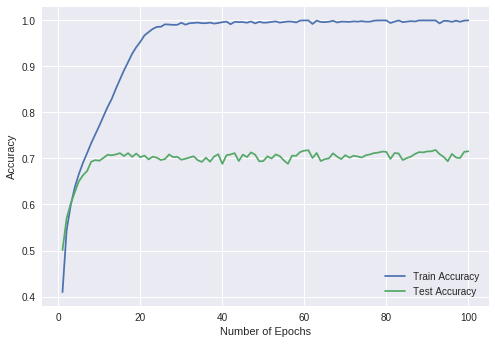

validation loss: 2.333927516269684
validation accuracy: 0.7156


In [0]:
#Data is fitted into architecture.
History = model.fit(train_x, train_y,batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(validate_x, validate_y))

#Calculating the loss and accuracy.  
scores = model.evaluate(validate_x, validate_y, verbose=0)
print('Test accuracy: %.2f%%' % (scores[1]*100))
print(scores)
print(History.history)

plotaccuracy = plt.plot(range(1,epochs+1),History.history['acc'],range(1,epochs+1),History.history['val_acc'])
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.legend(('Train Accuracy','Test Accuracy'))
plt.show(plotaccuracy)

print('validation loss:',History.history['val_loss'][-1])
print('validation accuracy:',History.history['val_acc'][-1])